Esercizio di gruppo


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')


In [3]:
df.drop('id', axis=1, inplace=True)
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [5]:
# Pulisco i NaN
df.dropna(subset='accident', inplace=True)

In [6]:
def print_fuel():
    df_fuel_type = df['fuel_type'].unique()
    print(len(df_fuel_type), df_fuel_type)
    for fuel in df_fuel_type:
        temp = len(df[df["fuel_type"]==fuel])
        print(f'{fuel}: {temp} -> {round(temp/len(df)*100,1)}%')
    return df_fuel_type
df_fuel_type= print_fuel()

8 ['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']
Gasoline: 163853 -> 88.1%
E85 Flex Fuel: 5328 -> 2.9%
nan: 0 -> 0.0%
Hybrid: 6741 -> 3.6%
Diesel: 3854 -> 2.1%
Plug-In Hybrid: 512 -> 0.3%
–: 764 -> 0.4%
not supported: 15 -> 0.0%


In [7]:
# df[df['fuel_type']==df_fuel_type[-2]]

In [8]:
# df[df['fuel_type']==df_fuel_type[-1]]

In [9]:
# Elimino i nan e i valori strani di fuel_type
df = df[df['fuel_type']!=df_fuel_type[-1]]
df = df[df['fuel_type']!=df_fuel_type[-2]]
df.dropna(subset='fuel_type', inplace=True)
print_fuel()

5 ['Gasoline' 'E85 Flex Fuel' 'Hybrid' 'Diesel' 'Plug-In Hybrid']
Gasoline: 163853 -> 90.9%
E85 Flex Fuel: 5328 -> 3.0%
Hybrid: 6741 -> 3.7%
Diesel: 3854 -> 2.1%
Plug-In Hybrid: 512 -> 0.3%


array(['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Diesel', 'Plug-In Hybrid'],
      dtype=object)

In [10]:
# Elimino i clean_title NaN
# df.dropna(subset='clean_title', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180288 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         180288 non-null  object
 1   model         180288 non-null  object
 2   model_year    180288 non-null  int64 
 3   milage        180288 non-null  int64 
 4   fuel_type     180288 non-null  object
 5   engine        180288 non-null  object
 6   transmission  180288 non-null  object
 7   ext_col       180288 non-null  object
 8   int_col       180288 non-null  object
 9   accident      180288 non-null  object
 10  clean_title   161840 non-null  object
 11  price         180288 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.9+ MB


In [12]:
new_df = df.copy()
new_df.drop(['int_col', 'fuel_type'], axis=1, inplace=True)

In [13]:
def gen_dict(df_temp: pd.DataFrame, colonna: str):
    unic = df_temp[colonna].unique()
    gen_dict= {}
    for i, dato in enumerate(unic):
        gen_dict[dato]=i
    return gen_dict

def string_uniq_to_int(lista: list, df_temp:pd.DataFrame):
    for col in lista:
        df_temp[col] = df_temp[col].map(gen_dict(df_temp, col))

In [14]:
lista_col = ['brand', 'model', 'engine', 'transmission', 'ext_col', 'accident', 'clean_title']
string_uniq_to_int(lista_col,new_df)
new_df

,brand,model,model_year,milage,engine,transmission,ext_col,accident,clean_title,price
0,0,0,2007,213000,0,0,0,0,0,4200
1,1,1,2002,143250,1,0,1,1,0,4999
2,2,2,2002,136731,2,0,2,0,0,13900
3,3,3,2017,19500,3,1,3,0,0,45000
4,4,4,2021,7388,4,2,3,0,0,97500
...,...,...,...,...,...,...,...,...,...,...
188528,8,11,2017,49000,11,1,4,0,0,27500
188529,4,935,2018,28600,241,3,4,1,0,30000
188530,4,902,2021,13650,16,2,4,0,0,86900
188531,5,899,2022,13895,865,35,81,0,1,84900


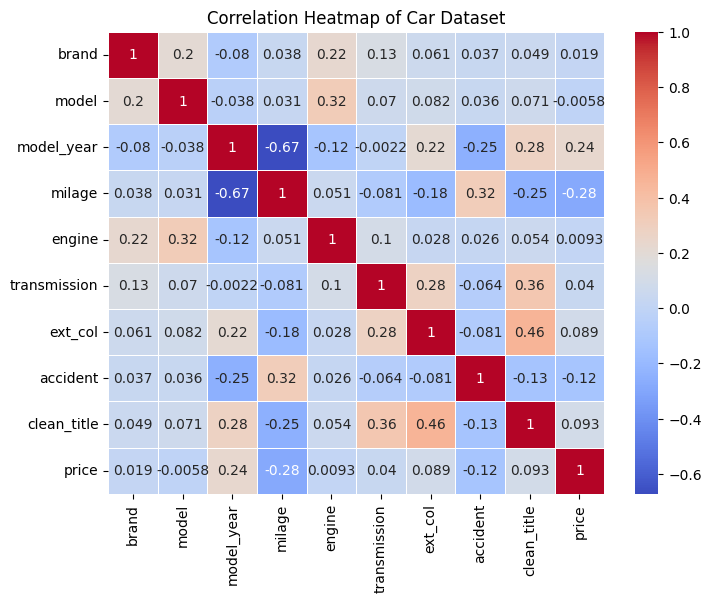

In [15]:
# Compute correlation matrix
corr = new_df.corr()

# Plotting Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Car Dataset')
plt.show()

In [16]:
df_clean_title= df['clean_title'].unique()
print(len(df_clean_title))
for ct in df_clean_title:
    temp = len(df[df['clean_title']==ct])
    print(f'{ct}: {temp} -> {round(temp/len(df)*100,1)}%')

2
Yes: 161840 -> 89.8%
nan: 0 -> 0.0%


In [17]:
df_brand = df['brand'].unique()
len(df_brand),df_brand

(57,
 array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
        'Ford', 'BMW', 'Cadillac', 'Land', 'GMC', 'Toyota', 'Hyundai',
        'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM', 'Hummer', 'Alfa',
        'INFINITI', 'Jeep', 'Porsche', 'McLaren', 'Honda', 'Lexus',
        'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia', 'Mitsubishi',
        'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn', 'Bentley', 'Tesla',
        'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini', 'Chrysler',
        'Lucid', 'Lotus', 'Scion', 'Plymouth', 'Suzuki', 'FIAT', 'Saab',
        'Bugatti', 'Mercury', 'Karma', 'Maybach', 'smart', 'Polestar'],
       dtype=object))

In [18]:
df_model = df['model'].unique()
len(df_model), df_model

(1887,
 array(['Cooper S Base', 'LS V8', 'Silverado 2500 LT', ...,
        'IONIQ Plug-In Hybrid SEL', 'bZ4X Limited', 'ForTwo Pure'],
       dtype=object))

In [19]:
df_accident = df['accident'].unique()
len(df_accident), df_accident

(2,
 array(['None reported', 'At least 1 accident or damage reported'],
       dtype=object))

In [20]:

print('Non inc.:', round(len(df [df['accident']==df_accident[0]])/len(df)*100,1),'Inc.:', round(len(df[df['accident']==df_accident[1]])/len(df)*100,1))

Non inc.: 77.2 Inc.: 22.8


In [21]:
# Anno modelli
np.min(df['model_year']), np.max(df['model_year'])

(np.int64(1974), np.int64(2024))

In [23]:
# Prezzo
min_price = np.min(df['price'])
max_price= np.max(df['price'])
min_price, max_price

(np.int64(2000), np.int64(2954083))